In [346]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from loguru import logger
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [347]:
import tomllib
configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
config


{'raw': 'data/raw',
 'processed': 'data/processed',
 'input': 'WhatsApp_chat.txt',
 'current': 'whatsapp-20240916-104455.parq'}

In [348]:
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning("Datafile does not exist. First run src/preprocess.py, and check the timestamp!")

Lets load the data

In [349]:
df = pd.read_parquet(datafile)
df

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week
0,2018-12-11 11:21:00,Hoi\r\n,effervescent-camel,False,True,6,False,worktimes,11:21:00,1
1,2018-12-11 11:21:00,Kijk wat ik heb gevonden\r\n,effervescent-camel,False,True,27,False,worktimes,11:21:00,1
2,2018-12-11 11:21:00,<Media weggelaten>\r\n,effervescent-camel,False,True,21,False,worktimes,11:21:00,1
3,2018-12-11 11:21:00,<Media weggelaten>\r\n,effervescent-camel,False,True,21,False,worktimes,11:21:00,1
4,2018-12-11 11:21:00,<Media weggelaten>\r\n,effervescent-camel,False,True,21,False,worktimes,11:21:00,1
...,...,...,...,...,...,...,...,...,...,...
5144,2024-07-04 03:20:00,Verder alles goed!\r\n,effervescent-camel,False,True,21,False,night,03:20:00,3
5145,2024-07-04 07:25:00,https://www.udinetoday.it/cronaca/navetta-gra...,nimble-wombat,False,True,64,True,morning,07:25:00,3
5146,2024-07-04 13:59:00,<Media weggelaten>\r\n,hilarious-goldfinch,False,True,21,False,worktimes,13:59:00,3
5147,2024-07-04 14:14:00,<Media weggelaten>\r\n,nimble-wombat,False,True,21,False,worktimes,14:14:00,3


Let's extract some more info from the timestamp:

In [350]:
df["date"] = df["timestamp"].dt.date
df["isoweek"] = df["timestamp"].dt.isocalendar().week
df["year-week"] = df["timestamp"].dt.strftime("%Y-%W")
df.head()


,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,date,isoweek,year-week
0,2018-12-11 11:21:00,Hoi\r\n,effervescent-camel,False,True,6,False,worktimes,11:21:00,1,2018-12-11,50,2018-50
1,2018-12-11 11:21:00,Kijk wat ik heb gevonden\r\n,effervescent-camel,False,True,27,False,worktimes,11:21:00,1,2018-12-11,50,2018-50
2,2018-12-11 11:21:00,<Media weggelaten>\r\n,effervescent-camel,False,True,21,False,worktimes,11:21:00,1,2018-12-11,50,2018-50
3,2018-12-11 11:21:00,<Media weggelaten>\r\n,effervescent-camel,False,True,21,False,worktimes,11:21:00,1,2018-12-11,50,2018-50
4,2018-12-11 11:21:00,<Media weggelaten>\r\n,effervescent-camel,False,True,21,False,worktimes,11:21:00,1,2018-12-11,50,2018-50


In [351]:
import datetime
start_maatregelen = '2019-01-01'
# eerste maatregel Covid - sluiting scholen braband
start_date = datetime.datetime.strptime(start_maatregelen, "%Y-%m-%d").date()
end_maatregelen = '2023-01-01'
#21 mei 2022 maatregelen Covid-19 niet meer van kracht
end_date = datetime.datetime.strptime(end_maatregelen, "%Y-%m-%d").date()

# Select DataFrame rows between two dates
mask = (df['date'] > start_date) & (df['date'] <= end_date)
df = df.loc[mask]

In [352]:
import datetime

start_maatregelen = '2020-03-09'
# eerste maatregel Covid - sluiting scholen braband
start_date = datetime.datetime.strptime(start_maatregelen, "%Y-%m-%d").date()
end_maatregelen = '2021-01-15'
#21 mei 2022 maatregelen Covid-19 niet meer van kracht
end_date = datetime.datetime.strptime(end_maatregelen, "%Y-%m-%d").date()

# Select DataFrame rows between two dates
mask = (df['date'] > start_date) & (df['date'] <= end_date)
df_corona = df.loc[mask]

In [353]:
start_normal = datetime.datetime.strptime('2017-01-01', "%Y-%m-%d").date()
end_normal = datetime.datetime.strptime(start_maatregelen, "%Y-%m-%d").date()

# Select DataFrame rows between two dates
mask = (df['date'] > start_normal) & (df['date'] <= end_normal)
df_beforecorona = df.loc[mask]
df_beforecorona

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,date,isoweek,year-week
7,2019-02-14 18:40:00,Hoi is het goed als ik bij Siem blijf eten\r\n,effervescent-camel,False,True,45,False,evening,18:40:00,3,2019-02-14,7,2019-06
8,2019-02-14 18:52:00,Ok\r\n,hilarious-goldfinch,False,True,5,False,evening,18:52:00,3,2019-02-14,7,2019-06
9,2019-03-16 20:01:00,<Media weggelaten>\r\n,nimble-wombat,False,True,21,False,evening,20:01:00,5,2019-03-16,11,2019-10
10,2019-03-16 20:03:00,Non sarà mai cosi buono come al delfino\r\n,effervescent-camel,False,True,42,False,evening,20:03:00,5,2019-03-16,11,2019-10
11,2019-03-16 20:04:00,Vero!😂\r\n,nimble-wombat,True,True,9,False,evening,20:04:00,5,2019-03-16,11,2019-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,2020-02-29 21:39:00,ok\r\n,hilarious-goldfinch,False,True,5,False,evening,21:39:00,5,2020-02-29,9,2020-08
382,2020-02-29 21:39:00,Ja hoor! Heb mn was net gedaan\r\n,effervescent-camel,False,True,33,False,evening,21:39:00,5,2020-02-29,9,2020-08
383,2020-02-29 21:39:00,👍\r\n,nimble-wombat,True,True,4,False,evening,21:39:00,5,2020-02-29,9,2020-08
384,2020-02-29 21:39:00,👌\r\n,hilarious-goldfinch,True,True,4,False,evening,21:39:00,5,2020-02-29,9,2020-08


In [354]:
start_normal = datetime.datetime.strptime(end_maatregelen, "%Y-%m-%d").date()
end_normal = datetime.datetime.strptime('2025-01-01', "%Y-%m-%d").date()

# Select DataFrame rows between two dates
mask = (df['date'] > start_normal) & (df['date'] <= end_normal)
df_aftercorona = df.loc[mask]
df_aftercorona

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,date,isoweek,year-week
422,2021-01-24 20:33:00,Ik krijg van Ninh binh een papiertje dat ik o...,effervescent-camel,False,True,65,False,evening,20:33:00,6,2021-01-24,3,2021-03
423,2021-01-24 20:33:00,Dus ik MOET even blijven 😂😂\r\n,effervescent-camel,True,True,30,False,evening,20:33:00,6,2021-01-24,3,2021-03
424,2021-01-24 20:33:00,😅\r\n,hilarious-goldfinch,True,True,4,False,evening,20:33:00,6,2021-01-24,3,2021-03
425,2021-01-24 20:34:00,effetto tiramisu\r\n,hilarious-goldfinch,False,True,19,False,evening,20:34:00,6,2021-01-24,3,2021-03
426,2021-01-24 20:50:00,😂\r\n,nimble-wombat,True,True,4,False,evening,20:50:00,6,2021-01-24,3,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,2022-12-24 17:12:00,Leuk! Tot zo\r\n,nimble-wombat,False,True,15,False,worktimes,17:12:00,5,2022-12-24,51,2022-51
2811,2022-12-25 16:37:00,<Media weggelaten>\r\n,spangled-rabbit,False,True,21,False,worktimes,16:37:00,6,2022-12-25,51,2022-51
2812,2022-12-25 17:24:00,😂\r\n,nimble-wombat,True,True,4,False,worktimes,17:24:00,6,2022-12-25,51,2022-51
2813,2022-12-25 17:35:00,🤣\r\n,hilarious-goldfinch,False,True,4,False,evening,17:35:00,6,2022-12-25,51,2022-51


In [355]:
def calc_messages(df):
    topk = list(df[df["is_topk"]].author.unique())
    p = df.groupby("year-week").count()     #group by the isoweeks
    min_ts = df["timestamp"].min()
    max_ts = df["timestamp"].max()
    new_index = pd.date_range(start=min_ts, end=max_ts, freq='W', name="year-week").strftime('%Y-%W')
    p = p.reindex(new_index, fill_value=0)
    return p

In [356]:
p = calc_messages(df)
p_coronatijd= calc_messages(df_corona)
p_postcorona = calc_messages(df_aftercorona)
p_beforecorona = calc_messages(df_beforecorona)

In [357]:
p  = calc_messages(df)
p_corona = calc_messages(df_corona)

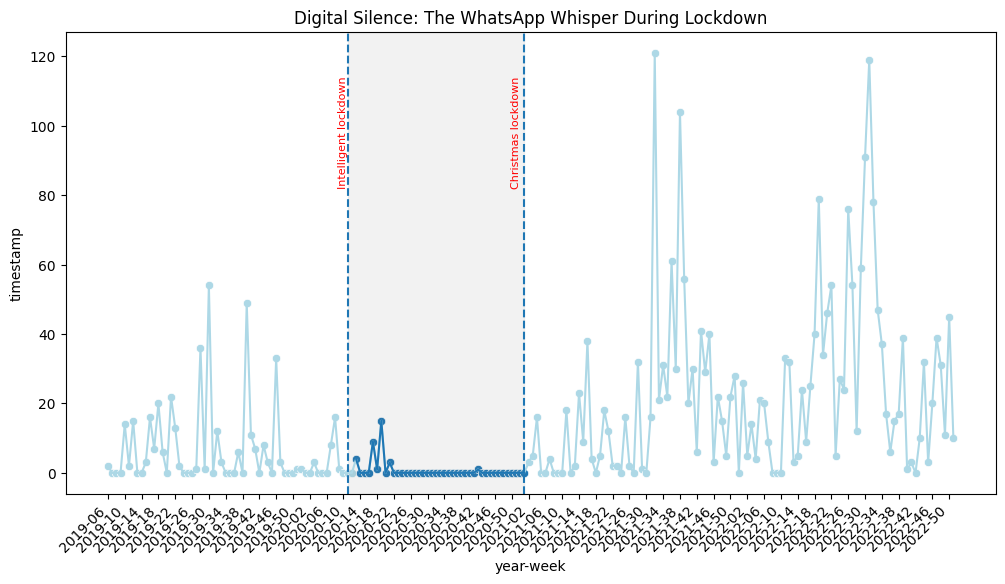

In [345]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=p, x=p.index, y="timestamp", ax=ax, color='lightblue')
sns.scatterplot(data=p_corona, x=p_corona.index, y="timestamp", ax=ax)

p["moving_avg"] = p["timestamp"].rolling(window=1).mean()
p_corona["moving_avg"] = p_corona["timestamp"].rolling(window=1).mean()
sns.lineplot(data=p, x=p.index, y="moving_avg", ax=ax, color='lightblue')
sns.lineplot(data=p_corona, x=p_corona.index, y="moving_avg", ax=ax)

# Define the x-coordinates for the vertical lines (start and end of the period)
start = '2020-11' #Tijdelijk verbod passagiersvluchten uit risicogebieden
end = '2021-01' #lockdown_feestdagen
#end = '2021-24' #begin vaccinatie periode - verplichte mondkapje

# Add vertical lines
ax.axvline(x=start,  linestyle='--', label='Start corona-beperkingen')
ax.axvline(x=end,  linestyle='--', label='End corona-beperkingen')

# Highlight the area between the two vertical lines
#ax.axvspan(start_x, end_x, color='gray', alpha=0.3)

# Label the vertical lines

ax.text(intelligente_lockdown, ax.get_ylim()[1] * 0.9, 'Intelligent lockdown', color='red', 
        horizontalalignment='right', fontsize=8, rotation=90, verticalalignment='top')  
ax.text(lockdown_feestdagen, ax.get_ylim()[1] * 0.9, 'Christmas lockdown', color='red', 
        horizontalalignment='center', fontsize=8, rotation=90, verticalalignment='top')    

# Highlight the area between the two vertical lines
ax.axvspan(start, end, color='gray', alpha=0.1)

# Customize x-ticks
interval = 4
xticks = p.index[::interval]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right')

# Add title and legend
plt.title("Digital Silence: The WhatsApp Whisper During Lockdown")
#ax.legend()

plt.show()

In [177]:
topk = list(df[df["is_topk"]].author.unique())
topk

['effervescent-camel',
 'nimble-wombat',
 'hilarious-goldfinch',
 'spangled-rabbit']

Now, we can group by the isoweeks, for example. 
Let's reindex in order to fill the missing weeks.

In [45]:
#df = df.drop(index=[0])

In [218]:
p = df.groupby("year-week").count()
p.head()

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,date,isoweek
year-week,,,,,,,,,,,,
2019-06,2,2,2,2,2,2,2,2,2,2,2,2
2019-10,14,14,14,14,14,14,14,14,14,14,14,14
2019-11,2,2,2,2,2,2,2,2,2,2,2,2
2019-12,15,15,15,15,15,15,15,15,15,15,15,15
2019-15,3,3,3,3,3,3,3,3,3,3,3,3


In [219]:
min_ts = df["timestamp"].min()
max_ts = df["timestamp"].max()
new_index = pd.date_range(start=min_ts, end=max_ts, freq='W', name="year-week").strftime('%Y-%W')
p = p.reindex(new_index, fill_value=0)
p.head()

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,date,isoweek
year-week,,,,,,,,,,,,
2019-06,2,2,2,2,2,2,2,2,2,2,2,2
2019-07,0,0,0,0,0,0,0,0,0,0,0,0
2019-08,0,0,0,0,0,0,0,0,0,0,0,0
2019-09,0,0,0,0,0,0,0,0,0,0,0,0
2019-10,14,14,14,14,14,14,14,14,14,14,14,14


Text(0.5, 1.0, 'Messages over time')

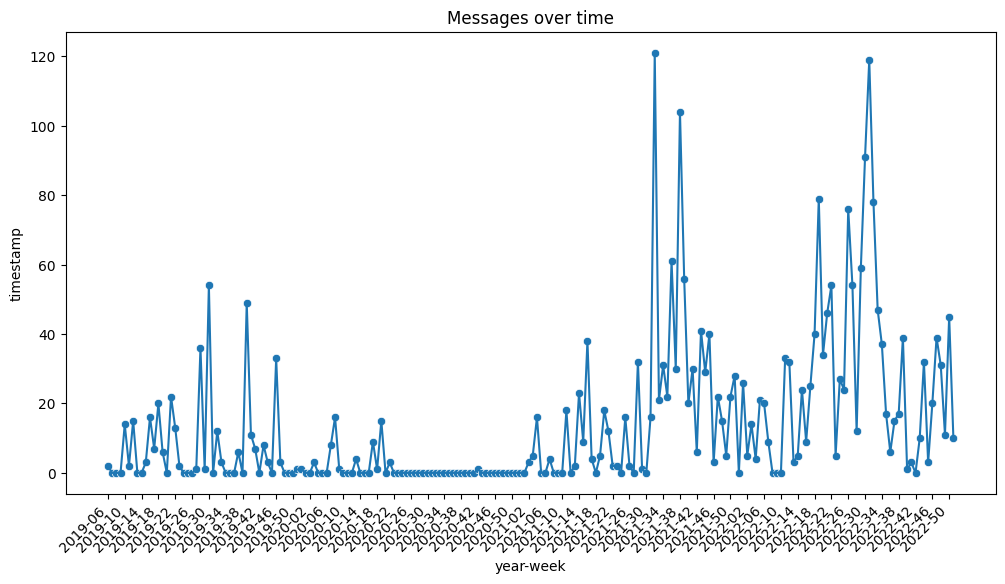

In [220]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=p, x=p.index, y="timestamp", ax=ax)
p["moving_avg"] = p["timestamp"].rolling(window=1).mean()
sns.lineplot(data=p, x=p.index, y="moving_avg", ax=ax)

interval = 4
xticks = p.index[::interval]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right');
plt.title("Messages over time")


In [ ]:
# Assuming `p` is your DataFrame
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=p, x=p.index, y="timestamp", ax=ax)
p["moving_avg"] = p["timestamp"].rolling(window=1).mean()
sns.lineplot(data=p, x=p.index, y="moving_avg", ax=ax)

# Define the x-coordinate for the vertical line
event_x = '2021-03'  # Replace with the actual x-coordinate for the event

# Add the vertical line
ax.axvline(x=event_x, color='red', linestyle='--', label='Corona lockdown')

# Customize x-ticks
interval = 4
xticks = p.index[::interval]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right')

# Add title and legend
plt.title("Messages over time")
ax.legend()

plt.show()

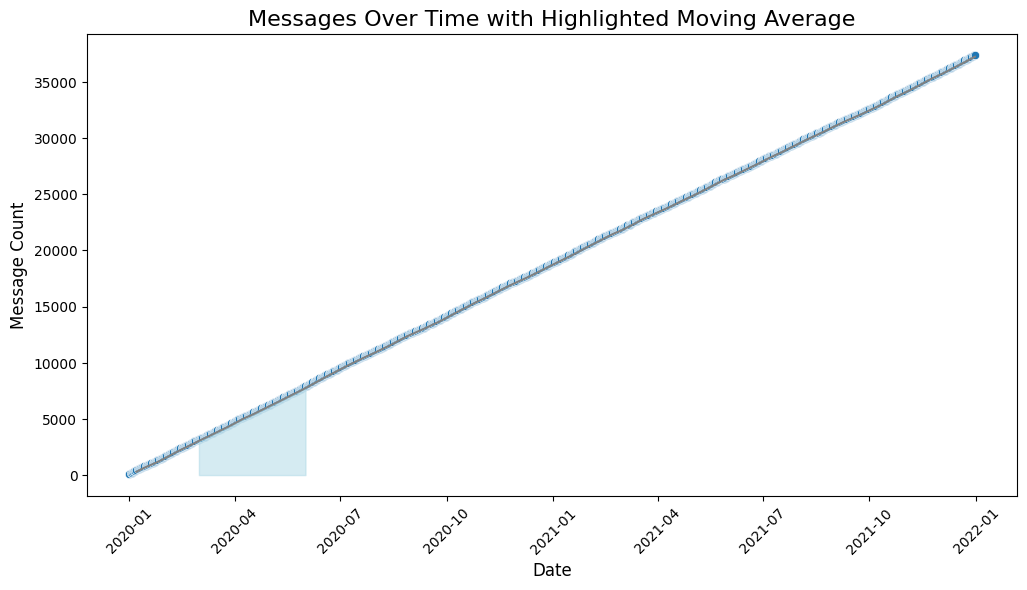

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame setup (replace this with your actual data)
dates = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')
message_counts = np.random.normal(loc=50, scale=10, size=len(dates)).cumsum() + 100  # Simulated data

# Create a DataFrame
p = pd.DataFrame({'date': dates, 'timestamp': message_counts})
p['moving_avg'] = p['timestamp'].rolling(window=7).mean()  # Example moving average with a window of 7

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot
sns.scatterplot(data=p, x='date', y='timestamp', ax=ax)

# Plot moving average
sns.lineplot(data=p, x='date', y='moving_avg', ax=ax, color='gray')

# Highlight a specific range in the moving average
highlight_start = pd.Timestamp('2020-03-01')
highlight_end = pd.Timestamp('2020-06-01')

# Fill between the moving average line in the specified range
ax.fill_between(p['date'], p['moving_avg'], where=(p['date'] >= highlight_start) & (p['date'] <= highlight_end),
                color='lightblue', alpha=0.5)

# Customize the plot
plt.title("Messages Over Time with Highlighted Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Message Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [152]:
df_corona.columns

Index(['timestamp', 'message', 'author', 'has_emoji', 'is_topk',
       'message_length', 'has_link', 'timestamp_category', 'hour',
       'day_of_week', 'date', 'isoweek', 'year-week'],
      dtype='object')

In [164]:
df_corona[ df_corona['message'].str.contains('corona')]

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,date,isoweek,year-week
630,2021-07-25 22:47:00,https://www.houstonchronicle.com/projects/202...,hilarious-goldfinch,False,True,81,True,late,22:47:00,6,2021-07-25,29,2021-29
1343,2021-12-23 17:23:00,"In order to kill COVID‐19, heat virus‐contain...",hilarious-goldfinch,False,True,935,False,worktimes,17:23:00,3,2021-12-23,51,2021-51
1368,2021-12-29 16:44:00,Bel later maar even dan kun je zeggen welke k...,nimble-wombat,False,True,113,False,worktimes,16:44:00,2,2021-12-29,52,2021-52
2431,2022-08-16 20:14:00,@5215636853302 hoe gaat het? Waar zit je?\r\n...,nimble-wombat,False,True,74,False,evening,20:14:00,1,2022-08-16,33,2022-33


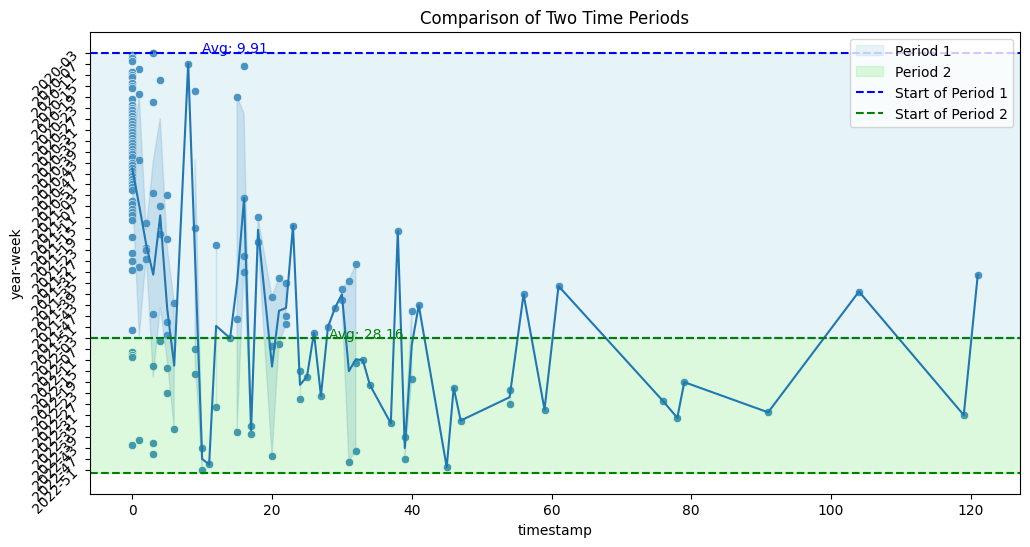

In [173]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=p, y=p.index, x="timestamp", ax=ax)
p["moving_avg"] = p["timestamp"].rolling(window=1).mean()
sns.lineplot(data=p, y=p.index, x="moving_avg", ax=ax)

# Define the two time periods
period_1_start = '2020-03'  # Replace with actual start
period_1_end = '2022-03'      # Replace with actual end
period_2_start = '2022-03'     # Replace with actual start
period_2_end = '2025-03'         # Replace with actual end

# Highlight the areas for each period
ax.axhspan(period_1_start, period_1_end, color='lightblue', alpha=0.3, label='Period 1')
ax.axhspan(period_2_start, period_2_end, color='lightgreen', alpha=0.3, label='Period 2')

# Add horizontal lines for each period
ax.axhline(y=period_1_start, color='blue', linestyle='--', label='Start of Period 1')
ax.axhline(y=period_1_end, color='blue', linestyle='--')
ax.axhline(y=period_2_start, color='green', linestyle='--', label='Start of Period 2')
ax.axhline(y=period_2_end, color='green', linestyle='--')

# Calculate and display average metrics for each period
avg_period_1 = p[(p.index >= period_1_start) & (p.index <= period_1_end)]["timestamp"].mean()
avg_period_2 = p[(p.index >= period_2_start) & (p.index <= period_2_end)]["timestamp"].mean()

# Add text annotations for average values
ax.text(avg_period_1, period_1_start, f'Avg: {avg_period_1:.2f}', color='blue', fontsize=10)
ax.text(avg_period_2, period_2_start, f'Avg: {avg_period_2:.2f}', color='green', fontsize=10)

# Customize y-ticks
interval = 4
yticks = p.index[::interval]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, rotation=45, ha='right')

# Add title and legend
plt.title("Comparison of Two Time Periods")
ax.legend()

plt.show()

Try to play with the colors. Make sure adding colors conveys a message, and isnt randomly adding colors.
Probaly, a scatterplot and lineplot are not the best way to show the count of messages per author, per week, for your data, so you might need to modify that. It might not even be useful for your data to do this (eg because you have too many authors).

The main goal here is to find some way to visualise the count over time, per author, and to give you some starting point if that is relevant for your dataset.

In [76]:
# keep only topk authors

p = df[df["author"].isin(topk)].groupby(["author", "year-week"]).count()
# p = df.groupby(["author", "year-week"]).count()
p

timestamp  message  has_emoji  is_topk  \
author             year-week                                           
effervescent-camel 2020-07            5        5          5        5   
                   2020-08            9        9          9        9   
                   2020-17            3        3          3        3   
                   2020-18            1        1          1        1   
                   2020-19            7        7          7        7   
...                                 ...      ...        ...      ...   
spangled-rabbit    2022-47            2        2          2        2   
                   2022-48            1        1          1        1   
                   2022-49            1        1          1        1   
                   2022-50            3        3          3        3   
                   2022-51            2        2          2        2   

                              message_length  has_link  timestamp_category  \
author             year-week                                                 
effervescent-camel 2020-07                 5         5                   5   
                   2020-08                 9         9                   9   
                   2020-17                 3         3                   3   
                   2020-18                 1         1                   1   
                   2020-19                 7         7                   7   
...                                      ...       ...                 ...   
spangled-rabbit    2022-47                 2         2                   2   
                   2022-48                 1         1                   1   
                   2022-49                 1         1                   1   
                   2022-50                 3         3                   3   
                   2022-51                 2         2                   2   

                              hour  day_of_week  date  isoweek  
author             year-week                                    
effervescent-camel 2020-07       5            5     5        5  
                   2020-08       9            9     9        9  
                   2020-17       3            3     3        3  
                   2020-18       1            1     1        1  
                   2020-19       7            7     7        7  
...                            ...          ...   ...      ...  
spangled-rabbit    2022-47       2            2     2        2  
                   2022-48       1            1     1        1  
                   2022-49       1            1     1        1  
                   2022-50       3            3     3        3  
                   2022-51       2            2     2        2  

[301 rows x 11 columns]

In [78]:
# authors = df["author"].unique()
multi_index = pd.MultiIndex.from_product([topk, new_index], names=["author", "year-week"])
p = p.reindex(multi_index, fill_value=0)
p

timestamp  message  has_emoji  is_topk  \
author          year-week                                           
nimble-wombat   2020-03            3        3          3        3   
                2020-04            0        0          0        0   
                2020-05            0        0          0        0   
                2020-06            0        0          0        0   
                2020-07            0        0          0        0   
...                              ...      ...        ...      ...   
spangled-rabbit 2022-47            2        2          2        2   
                2022-48            1        1          1        1   
                2022-49            1        1          1        1   
                2022-50            3        3          3        3   
                2022-51            2        2          2        2   

                           message_length  has_link  timestamp_category  hour  \
author          year-week                                                       
nimble-wombat   2020-03                 3         3                   3     3   
                2020-04                 0         0                   0     0   
                2020-05                 0         0                   0     0   
                2020-06                 0         0                   0     0   
                2020-07                 0         0                   0     0   
...                                   ...       ...                 ...   ...   
spangled-rabbit 2022-47                 2         2                   2     2   
                2022-48                 1         1                   1     1   
                2022-49                 1         1                   1     1   
                2022-50                 3         3                   3     3   
                2022-51                 2         2                   2     2   

                           day_of_week  date  isoweek  
author          year-week                              
nimble-wombat   2020-03              3     3        3  
                2020-04              0     0        0  
                2020-05              0     0        0  
                2020-06              0     0        0  
                2020-07              0     0        0  
...                                ...   ...      ...  
spangled-rabbit 2022-47              2     2        2  
                2022-48              1     1        1  
                2022-49              1     1        1  
                2022-50              3     3        3  
                2022-51              2     2        2  

[612 rows x 11 columns]

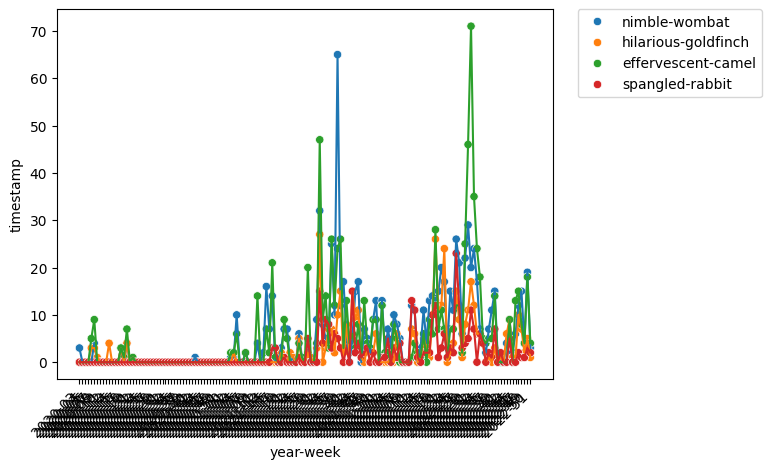

In [82]:
# put legend outside the plot
sns.scatterplot(data=p, x="year-week", y="timestamp", hue="author", legend=True)
sns.lineplot(data=p, x="year-week", y="timestamp", legend=False, hue="author")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45, ha='right');

In [83]:
df["day_of_week"] = df["timestamp"].dt.day_name()
df_agg = df.groupby(['date', 'day_of_week']).size().reset_index(name='message_count')
df_agg

,date,day_of_week,message_count
0,2020-01-26,Sunday,3
1,2020-02-19,Wednesday,8
2,2020-02-26,Wednesday,10
3,2020-02-29,Saturday,6
4,2020-03-07,Saturday,1
...,...,...,...
309,2022-12-22,Thursday,4
310,2022-12-23,Friday,1
311,2022-12-24,Saturday,2
312,2022-12-25,Sunday,3


Sometimes, you want to group the timeseries in clusters, eg per day of the week (of per month, or per year, etc).
Facetgrid is a nice way to do this.

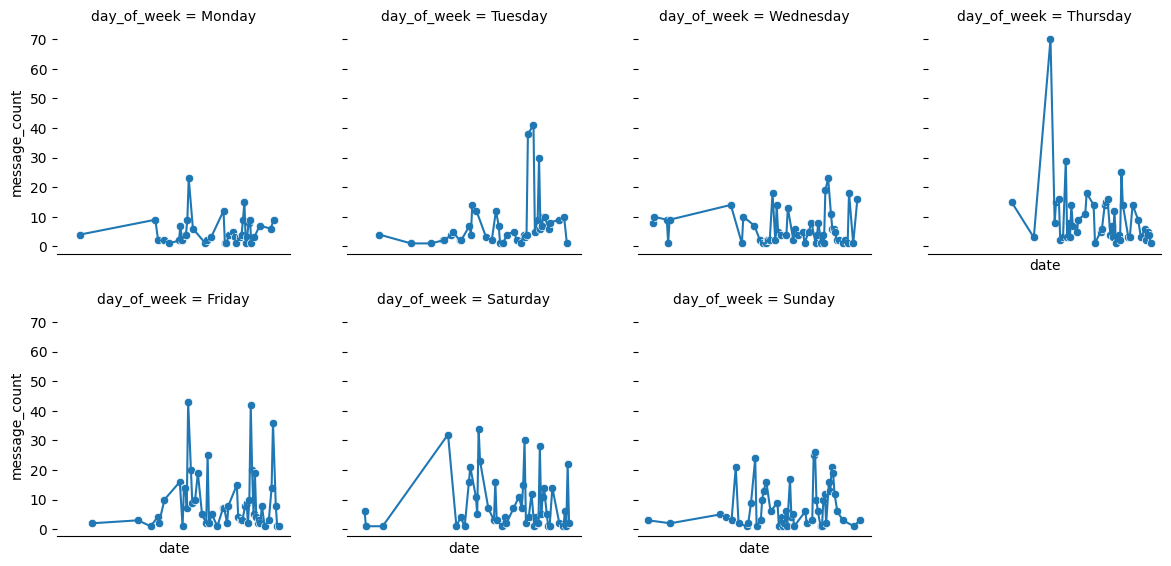

In [85]:
# Set the order of the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a FacetGrid to plot the line plots for each day of the week
g = sns.FacetGrid(df_agg, col='day_of_week', col_wrap=4, height=3, col_order=days_order)
g.map(sns.scatterplot, 'date', 'message_count')
g.map(sns.lineplot, 'date', 'message_count')
g.set(xticks=[])
g.despine(left=True, bottom=False)

Another nice plot is the area plot. Plotly has a nice version if this one.

In [87]:
import plotly.express as px
# first count the number for every category, for every date
p = df.groupby(["date", "timestamp_category"]).size().reset_index(name='message_count')
# then, make the count cumulative for every category
p['cumulative_count'] = p.groupby('timestamp_category')['message_count'].cumsum()

fig = px.area(p, x="date", y="cumulative_count", color="timestamp_category",
              line_group="timestamp_category", labels={"cumulative_count": "Cumulative Message Count"})
fig.show()

# Code for two authors

I have experimented with two authors, and explored the question "who is the first (or last) of the day to send a message?".
I didnt tweak this for groupchats.

In [88]:
df_grouped = df.groupby('date').agg({
    'timestamp': ['min', 'max'],
    'author': ['first', 'last'],
    })
df_grouped.columns = df_grouped.columns.map("_".join)
df_grouped

,timestamp_min,timestamp_max,author_first,author_last
date,,,,
2020-01-26,2020-01-26 00:20:00,2020-01-26 00:20:00,nimble-wombat,nimble-wombat
2020-02-19,2020-02-19 11:38:00,2020-02-19 15:22:00,hilarious-goldfinch,effervescent-camel
2020-02-26,2020-02-26 09:01:00,2020-02-26 12:49:00,effervescent-camel,effervescent-camel
2020-02-29,2020-02-29 21:38:00,2020-02-29 21:39:00,effervescent-camel,hilarious-goldfinch
2020-03-07,2020-03-07 22:39:00,2020-03-07 22:39:00,hilarious-goldfinch,hilarious-goldfinch
...,...,...,...,...
2022-12-22,2022-12-22 14:29:00,2022-12-22 23:40:00,spangled-rabbit,effervescent-camel
2022-12-23,2022-12-23 11:16:00,2022-12-23 11:16:00,effervescent-camel,effervescent-camel
2022-12-24,2022-12-24 17:12:00,2022-12-24 17:12:00,effervescent-camel,nimble-wombat


In [89]:
df_grouped['timestamp_max_shifted'] = df_grouped['timestamp_max'].shift()

# Calculate the time difference
df_grouped['time_difference'] = df_grouped['timestamp_min'] - df_grouped['timestamp_max_shifted']
df_grouped

,timestamp_min,timestamp_max,author_first,author_last,timestamp_max_shifted,time_difference
date,,,,,,
2020-01-26,2020-01-26 00:20:00,2020-01-26 00:20:00,nimble-wombat,nimble-wombat,NaT,NaT
2020-02-19,2020-02-19 11:38:00,2020-02-19 15:22:00,hilarious-goldfinch,effervescent-camel,2020-01-26 00:20:00,24 days 11:18:00
2020-02-26,2020-02-26 09:01:00,2020-02-26 12:49:00,effervescent-camel,effervescent-camel,2020-02-19 15:22:00,6 days 17:39:00
2020-02-29,2020-02-29 21:38:00,2020-02-29 21:39:00,effervescent-camel,hilarious-goldfinch,2020-02-26 12:49:00,3 days 08:49:00
2020-03-07,2020-03-07 22:39:00,2020-03-07 22:39:00,hilarious-goldfinch,hilarious-goldfinch,2020-02-29 21:39:00,7 days 01:00:00
...,...,...,...,...,...,...
2022-12-22,2022-12-22 14:29:00,2022-12-22 23:40:00,spangled-rabbit,effervescent-camel,2022-12-17 19:37:00,4 days 18:52:00
2022-12-23,2022-12-23 11:16:00,2022-12-23 11:16:00,effervescent-camel,effervescent-camel,2022-12-22 23:40:00,0 days 11:36:00
2022-12-24,2022-12-24 17:12:00,2022-12-24 17:12:00,effervescent-camel,nimble-wombat,2022-12-23 11:16:00,1 days 05:56:00


Text(0.5, 1.0, 'author1 +, author2 -')

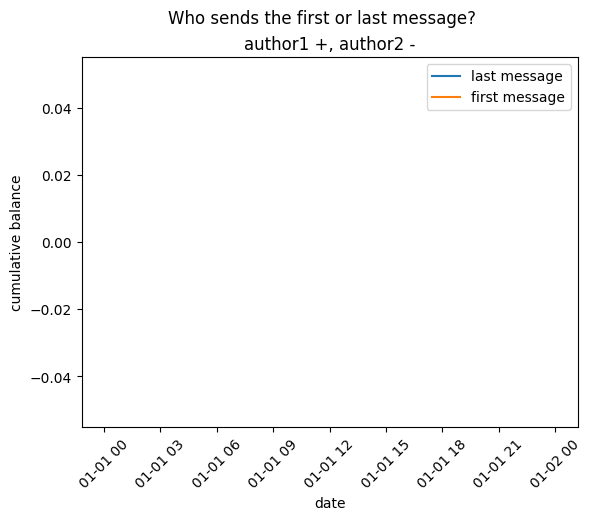

In [90]:
# this only works with two authors
mapping = {'author1': 1, 'author2' : -1}
df_grouped['last_message'] = df_grouped['author_last'].map(mapping)
df_grouped['first_message'] = df_grouped['author_first'].map(mapping)
df_grouped["last_balance"] = df_grouped['last_message'].cumsum()
df_grouped["first_balance"] = df_grouped['first_message'].cumsum()

sns.lineplot(data=df_grouped, x='date', y='last_balance', label="last message")
sns.lineplot(data=df_grouped, x='date', y='first_balance', label="first message")
plt.xticks(rotation=45);
plt.ylabel("cumulative balance")
plt.suptitle("Who sends the first or last message?")
plt.title("author1 +, author2 -")


In [91]:
df_grouped.head()

,timestamp_min,timestamp_max,author_first,author_last,timestamp_max_shifted,time_difference,last_message,first_message,last_balance,first_balance
date,,,,,,,,,,
2020-01-26,2020-01-26 00:20:00,2020-01-26 00:20:00,nimble-wombat,nimble-wombat,NaT,NaT,NaN,NaN,NaN,NaN
2020-02-19,2020-02-19 11:38:00,2020-02-19 15:22:00,hilarious-goldfinch,effervescent-camel,2020-01-26 00:20:00,24 days 11:18:00,NaN,NaN,NaN,NaN
2020-02-26,2020-02-26 09:01:00,2020-02-26 12:49:00,effervescent-camel,effervescent-camel,2020-02-19 15:22:00,6 days 17:39:00,NaN,NaN,NaN,NaN
2020-02-29,2020-02-29 21:38:00,2020-02-29 21:39:00,effervescent-camel,hilarious-goldfinch,2020-02-26 12:49:00,3 days 08:49:00,NaN,NaN,NaN,NaN
2020-03-07,2020-03-07 22:39:00,2020-03-07 22:39:00,hilarious-goldfinch,hilarious-goldfinch,2020-02-29 21:39:00,7 days 01:00:00,NaN,NaN,NaN,NaN


In [92]:
def time_to_decimal(time_obj):
    return time_obj.hour + time_obj.minute / 60 + time_obj.second / 3600

df_grouped["decimal_first_time"] = df_grouped.timestamp_min.apply(time_to_decimal)
df_grouped["decimal_last_time"] = df_grouped.timestamp_max.apply(time_to_decimal)


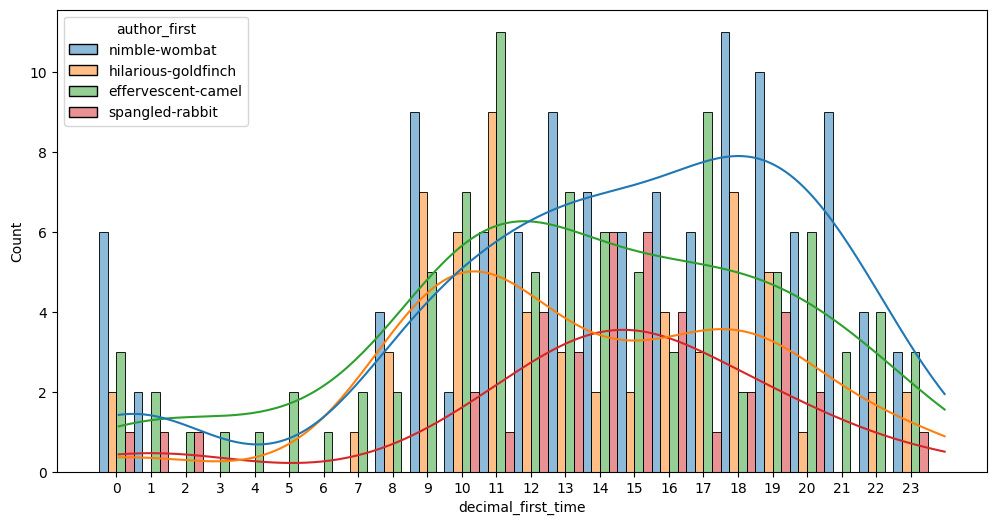

In [93]:

fig, ax = plt.subplots(figsize=(12, 6))
center = [t - 0.5 for t in range(0,25)]
sns.histplot(data=df_grouped,
    x='decimal_first_time',
    hue='author_first',
    common_norm=False,
    fill=True,
    bins=center,
    multiple="dodge",
    kde=True,
    ax=ax)
ax.set_xticks(range(0,24));

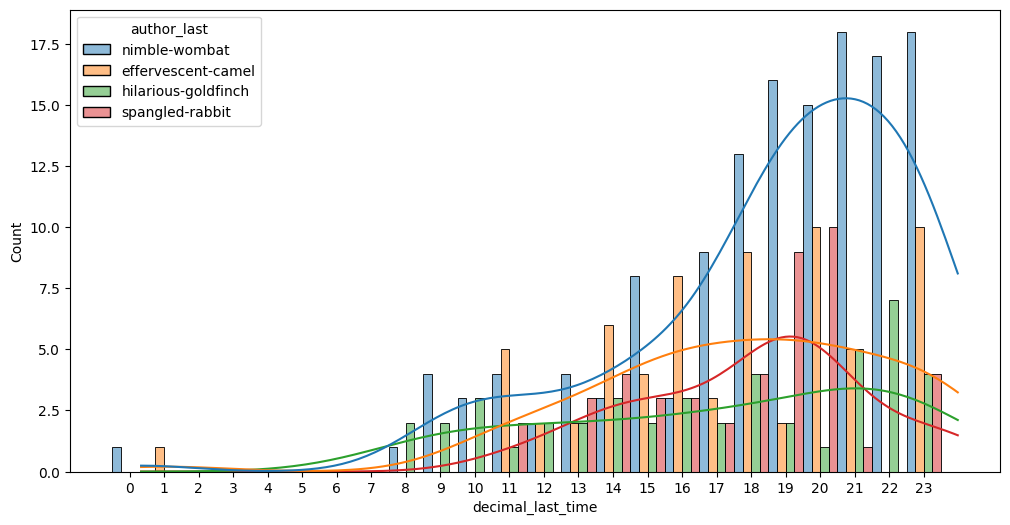

In [94]:
fig, ax = plt.subplots(figsize=(12, 6))
center = [t - 0.5 for t in range(0,25)]
sns.histplot(data=df_grouped,
    x='decimal_last_time',
    hue='author_last',
    common_norm=False,
    fill=True,
    bins=center,
    multiple="dodge",
    kde=True,
    ax=ax)
ax.set_xticks(range(0,24));

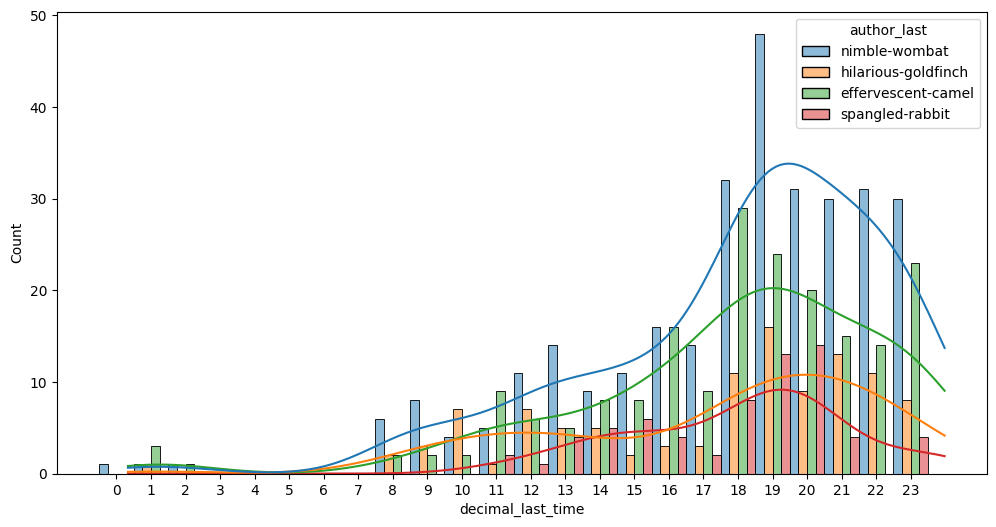

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
center = [t - 0.5 for t in range(0,25)]
sns.histplot(data=df_grouped,
    x='decimal_last_time',
    hue='author_last',
    common_norm=False,
    fill=True,
    bins=center,
    multiple="dodge",
    kde=True,
    ax=ax)
ax.set_xticks(range(0,24));

In [97]:
import numpy as np
def decimal_delta(td):
    if td == 0:
        return 0
    return td.total_seconds() / 3600

df["next_author"] = df.author.shift(-1)
df["next_timestamp"] = df.timestamp.shift(-1)
df["reaction_time"] = df.next_timestamp - df.timestamp
df["decimal_reaction_time"] = df.reaction_time.apply(decimal_delta)
df["reply"] = df.apply(lambda x: x.author != x.next_author, axis=1)
df.head()

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,date,isoweek,year-week,next_author,next_timestamp,reaction_time,decimal_reaction_time,reply
358,2020-01-26 00:20:00,Pol. H'sum zkt ivm overval omg Koningsstr 2 m...,nimble-wombat,False,True,153,False,night,00:20:00,Sunday,2020-01-26,4,2020-03,nimble-wombat,2020-01-26 00:20:00,0 days 00:00:00,0.000000,False
359,2020-01-26 00:20:00,<Media weggelaten>\r\n,nimble-wombat,False,True,21,False,night,00:20:00,Sunday,2020-01-26,4,2020-03,nimble-wombat,2020-01-26 00:20:00,0 days 00:00:00,0.000000,False
360,2020-01-26 00:20:00,<Media weggelaten>\r\n,nimble-wombat,False,True,21,False,night,00:20:00,Sunday,2020-01-26,4,2020-03,hilarious-goldfinch,2020-02-19 11:38:00,24 days 11:18:00,587.300000,True
361,2020-02-19 11:38:00,https://photos.app.goo.gl/ofpMmmK15sqiDLwH8\r\n,hilarious-goldfinch,False,True,46,True,worktimes,11:38:00,Wednesday,2020-02-19,8,2020-07,hilarious-goldfinch,2020-02-19 11:48:00,0 days 00:10:00,0.166667,False
362,2020-02-19 11:48:00,https://photos.app.goo.gl/5Yi3yhWSj9BUokgR7\r\n,hilarious-goldfinch,False,True,46,True,worktimes,11:48:00,Wednesday,2020-02-19,8,2020-07,effervescent-camel,2020-02-19 15:21:00,0 days 03:33:00,3.550000,True


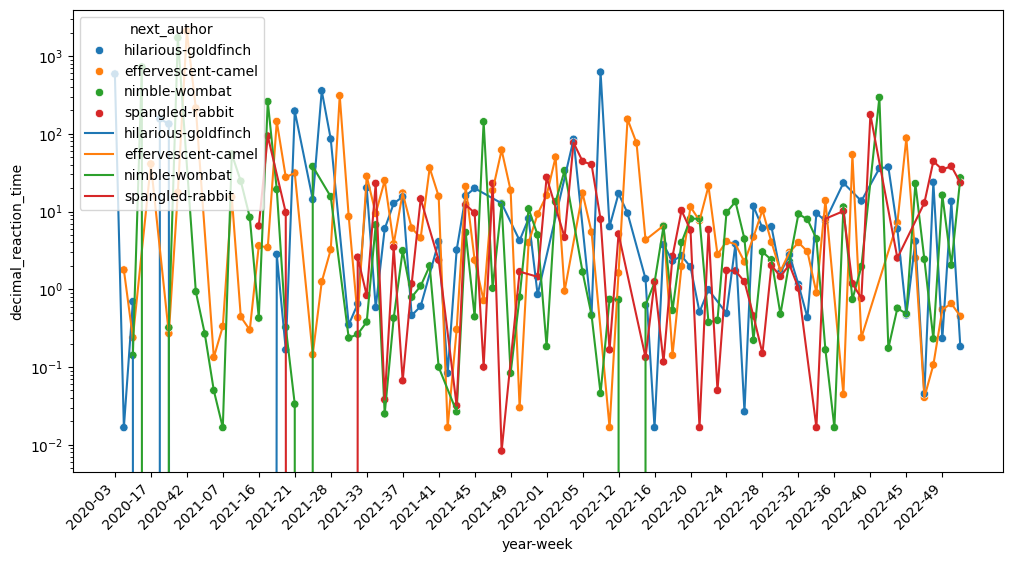

In [100]:
fig, ax = plt.subplots(figsize=(12, 6))
p = df[df.reply].groupby(['year-week', 'next_author']).agg({'decimal_reaction_time': 'mean'})
sns.scatterplot(data=p, x='year-week', y='decimal_reaction_time', hue='next_author', ax=ax)
sns.lineplot(data=p, x='year-week', y='decimal_reaction_time', hue='next_author', ax=ax)
plt.yscale('log')
interval = 4
xticks = p.reset_index()['year-week'].unique()[::interval]
# xticks = p.index[::interval]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45, ha='right');

(0.0, 24.0)

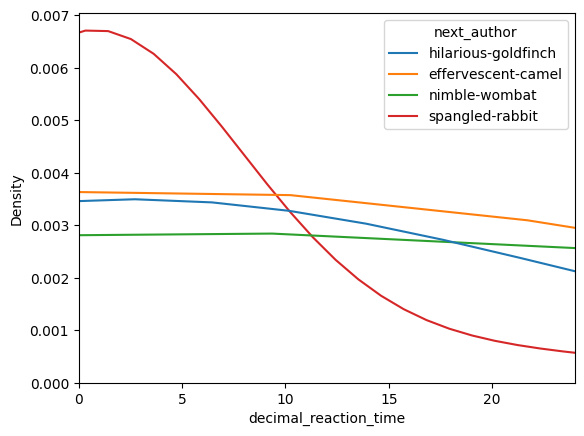

In [101]:
p = df[df.reply]

sns.kdeplot(
    data=p,
    x='decimal_reaction_time',
    hue='next_author'
)
plt.xlim((0,24))
# plt.yscale('log')